In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset from CSV
df = pd.read_csv('house_data.csv')

In [4]:
# Exploratory Data Analysis (EDA)
# Let's take a quick look at the first few rows of the dataset
print(df.head())


   date  age  distance  stores  latitude  longitude  price
0  2009   21         9       6        84        121  14264
1  2007    4         2       3        86        121  12032
2  2016   18         3       7        90        120  13560
3  2002   13         2       2        80        128  12029
4  2014   25         5       8        81        122  14157


In [5]:
# Summary statistics of the dataset
print(df.describe())


              date          age     distance       stores    latitude  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.00000   
mean   2008.912800    18.945000     4.977800     4.915000    84.97140   
std       5.457578    11.329539     3.199837     3.142889     3.16199   
min    2000.000000     0.000000     0.000000     0.000000    80.00000   
25%    2004.000000     9.000000     2.000000     2.000000    82.00000   
50%    2009.000000    19.000000     5.000000     5.000000    85.00000   
75%    2014.000000    29.000000     8.000000     8.000000    88.00000   
max    2018.000000    38.000000    10.000000    10.000000    90.00000   

         longitude         price  
count  5000.000000   5000.000000  
mean    124.994200  13906.638600  
std       3.167992   1020.774876  
min     120.000000  11263.000000  
25%     122.000000  13197.750000  
50%     125.000000  13893.500000  
75%     128.000000  14614.000000  
max     130.000000  16964.000000  


In [6]:
# Check for missing values
print(df.isnull().sum())

date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64


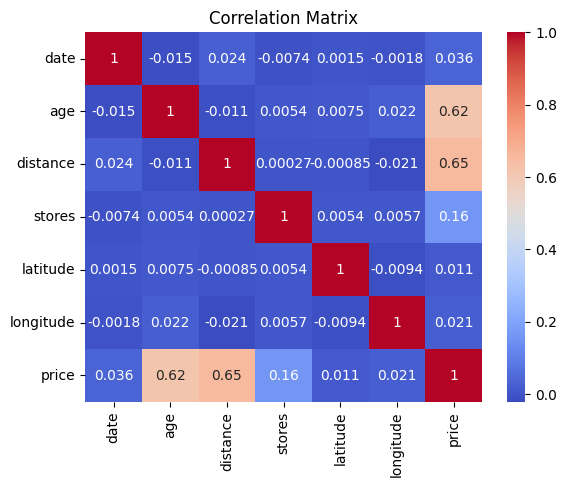

In [7]:
# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Preprocessing: Selecting features and target variable
X = df[['date', 'age', 'distance', 'stores', 'latitude', 'longitude']]
y = df['price']


In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 171076.7044319437
R-squared: 0.8396624371700676


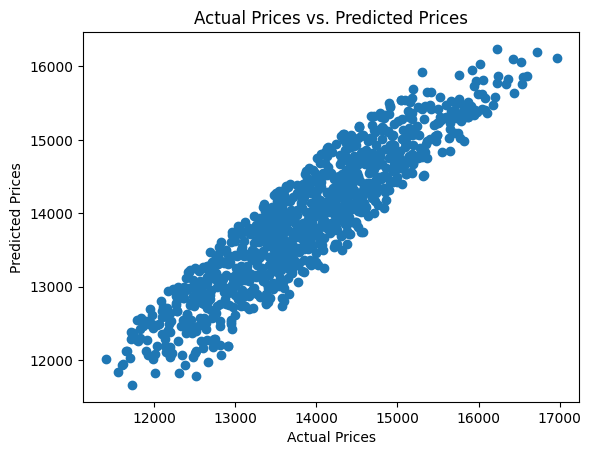

In [16]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()




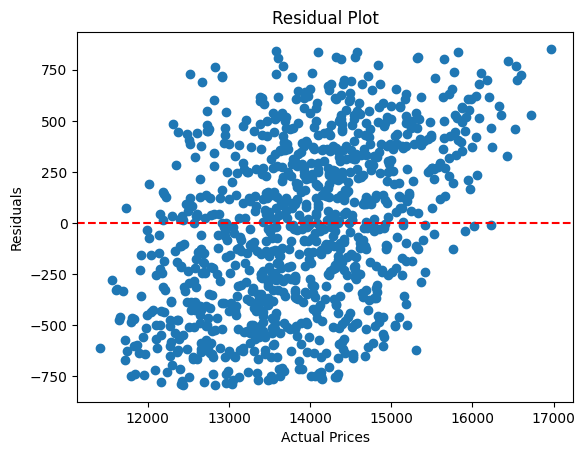

In [15]:
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()